In [86]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import scipy
import pandas as pd
import glob
import cv2
from skimage.io import imread, imshow
from os import listdir,makedirs
from os.path import isfile,join
import matplotlib.image as mpimg
from PIL import Image
import os.path, sys
import opendatasets as od
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [66]:
od.download("https://www.kaggle.com/iamsouravbanerjee/animal-image-dataset-90-different-animals")

Skipping, found downloaded files in "./animal-image-dataset-90-different-animals" (use force=True to force download)


In [67]:
parent_dir = '/Users/satomiito/Desktop/118B/Cogs 118b Final Project/animal'


animals = []
for filename in glob.glob(parent_dir + "/*.jpg"):
    im = np.asarray(Image.open(filename))
    animals.append(im)

In [68]:
len(animals)

5376

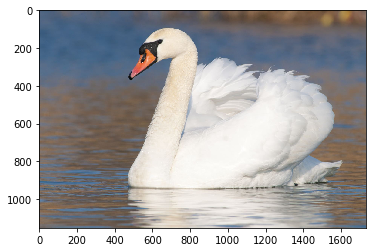

In [69]:
#test
plt.imshow(animals[1000])

In [70]:
animals[1000].shape

(1154, 1732, 3)

In [71]:
animals[0].size

150975

In [72]:
def runKMeans(K, X, n):
    N, D = X.shape

    Kmus = np.zeros((K, D))

    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]

    maxiters = n

    for iter in range(maxiters):
        sqDmat = calcSqDistances_vector(X, Kmus)
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus
        time.sleep(1)
        Kmus = recalcMus(X, Rnk)

        if np.sum(np.abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            print(iter)
            break
        
    plotCurrent(X, Rnk, Kmus)
    return Kmus
    

In [73]:
def calcSqDistances_vector(X, Kmus):
    return ((-2*X.dot(Kmus.T) + np.sum(np.multiply(Kmus,Kmus), axis=1).T).T + np.sum(np.multiply(X,X), axis=1)).T

In [74]:
def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis=1)
    return np.eye(sqDmat.shape[1])[m]

In [75]:
def recalcMus(X, Rnk):
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk, axis=0))).T

In [76]:
def plotCurrent(X, Rnk, Kmus):
    N, D = X.shape
    K = Kmus.shape[0]

    InitColorMat = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [0, 0, 1],
                             [0, 0, 0],
                             [1, 1, 0],
                             [1, 0, 1],
                             [0, 1, 1],
                             [.5, 0, 0],
                             [0, .5, 0],
                             [0, 0, .5],])

    KColorMat = InitColorMat[0:K,:]

    colorVec = np.dot(Rnk, KColorMat)
    muColorVec = np.dot(np.eye(K), KColorMat)
    plt.scatter(X[:,0], X[:,1], c=colorVec)

    plt.scatter(Kmus[:,0], Kmus[:,1], s=200, c=muColorVec, marker='d')
    plt.axis('equal')
    plt.show()

In [79]:
def get_cluster_plot(Kmus, rows=2): 
    '''
    : get a plot of what different clusters represent
    : takes as input the cluster location matrix
    '''
    fig,axs = plt.subplots(rows,5, figsize = (15,9))
    for i in range(len(Kmus)):
        cluster = Kmus[i].reshape(28,-1) * 255
        axs[i//5][i%5].imshow(cluster, cmap = plt.cm.binary)
        axs[i//5][i%5].set_title(f'Cluster {i + 1}')

In [90]:
animal_data = pd.DataFrame(animals)
animal_data['1'] = animals
animal_data

,0,1
0,"[[[58, 53, 49], [59, 54, 48], [62, 55, 45], [6...","[[[58, 53, 49], [59, 54, 48], [62, 55, 45], [6..."
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,"[[[141, 139, 152], [143, 141, 154], [135, 133,...","[[[141, 139, 152], [143, 141, 154], [135, 133,..."
3,"[[[71, 61, 52], [68, 58, 49], [72, 62, 53], [8...","[[[71, 61, 52], [68, 58, 49], [72, 62, 53], [8..."
4,"[[[152, 169, 199], [152, 169, 199], [152, 169,...","[[[152, 169, 199], [152, 169, 199], [152, 169,..."
...,...,...
5371,"[[[178, 160, 98], [177, 158, 99], [174, 159, 1...","[[[178, 160, 98], [177, 158, 99], [174, 159, 1..."
5372,"[[[172, 172, 182], [172, 172, 182], [173, 173,...","[[[172, 172, 182], [172, 172, 182], [173, 173,..."
5373,"[[[117, 112, 108], [120, 115, 111], [119, 114,...","[[[117, 112, 108], [120, 115, 111], [119, 114,..."
5374,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [92]:
animal_data.shape

(5376, 2)

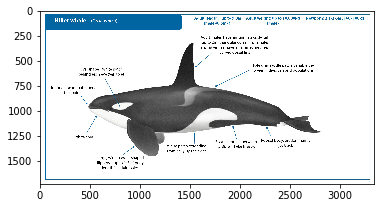

In [93]:
# test
plt.imshow(animal_data.loc[800].at["1"])

In [95]:
X = animal_data.iloc[:,[0, 1]].values

n = 10

K = 1000

In [96]:
X.shape


(5376, 2)

In [97]:
runKMeans(10, X, K)

ValueError: operands could not be broadcast together with shapes (206,245,3) (183,275,3) 